In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as signal

EMA-Filterdefinition

$$y[k] = \alpha * x[k] + (1-\alpha) * y[k-1]$$



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Cutoff-Frequenz [Hz]: 0.016784180613198894 * f_s
1333


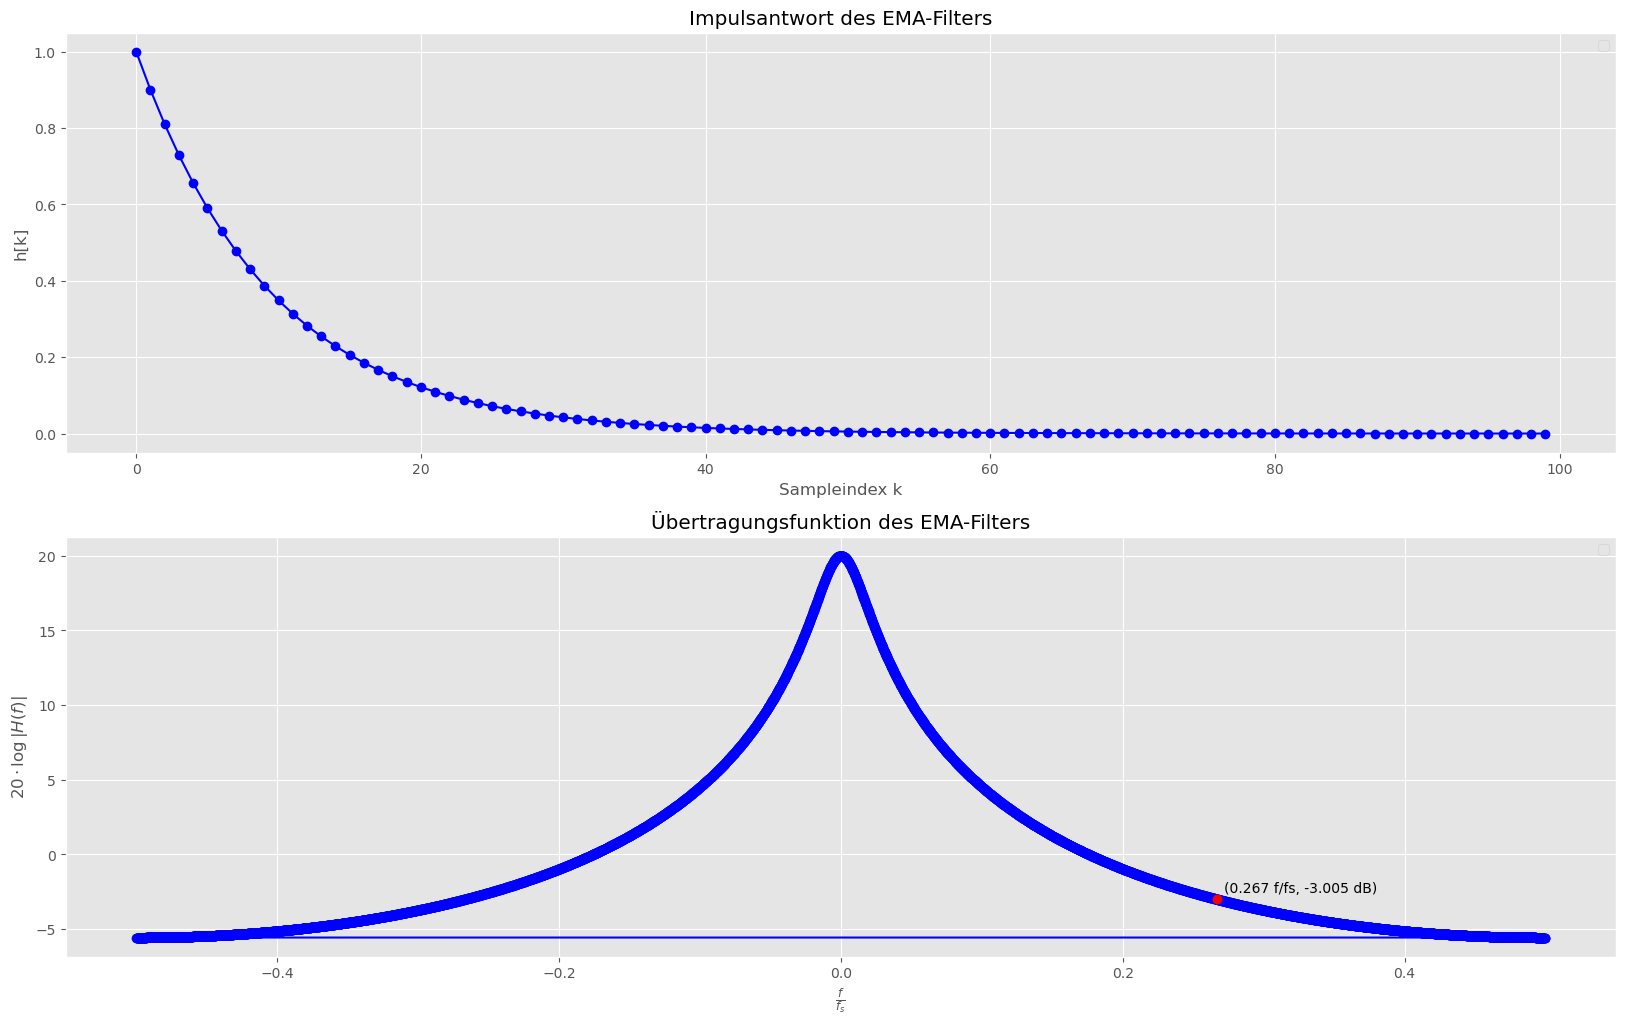

In [61]:
a = 0.1
f_s = 1 #Normierte Samplingfrequenz
f_c = f_s / (2* np.pi) * np.arccos(1- (a**2/(2*(1-a))))
print('Cutoff-Frequenz [Hz]:',f_c, '* f_s')

#Unit Response 
dirac = np.zeros(5000)
dirac[0] = 1

h = np.zeros(len(dirac))
y = 1
#Filter
for i in range (len(h)):
    h[i] = a * dirac[i] + (1-a) * y
    y = h[i]

#Transfer function
H = np.fft.fft(h)
freq = np.fft.fftfreq(h.shape[-1])


#Plot h
plt.style.use('ggplot')
fig, (ax1, ax2) = plt.subplots(2,1 ,figsize = (20,12))
ax1.plot(h[:100], 'bo-')
ax1.set_title('Impulsantwort des EMA-Filters')
ax1.set_xlabel('Sampleindex k')
ax1.set_ylabel('h[k]')
ax1.grid(True)
ax1.legend()

#Plot H
# -3dB Datenpunkt finden
index_to_mark = np.argmax(20*np.log10(abs(H)) <= -3)
print(index_to_mark)

ax2.plot(freq,20*np.log10(abs(H)), 'bo-')
ax2.plot(freq[index_to_mark], 20*np.log10(abs(H[index_to_mark])), 'ro')
ax2.annotate(f'({freq[index_to_mark]:.3f} f/fs, {20*np.log10(abs(H[index_to_mark])):.3f} dB)', (freq[index_to_mark], 20*np.log10(abs(H[index_to_mark]))), xytext=(5, 5), textcoords='offset points')

ax2.set_title('Übertragungsfunktion des EMA-Filters')
ax2.set_xlabel(r'$\frac{f}{f_s}$')
ax2.set_ylabel(r'$20 \cdot \log{|H(f)|}$')
ax2.grid(True)
ax2.legend()


